# SVM(Support Vector Machine)


### SVM을 활용한 비만도(BMI) 측정 예측
- BMI = 몸무게(Kg) / 키(m) * 키(m)
- BMI가 18.5 이상 25 미만 일때가 표준 몸무게입니다.

In [1]:
# 데이터를 획득하기 위해 무작위로 2만명 데이터를 생성.
# 키(cm), 몸무게(kg), Label(저체중(thin), 정상체중(normal), 비만(fat)의 csv 생성

import random

# BMI를 계산해서 Label을 return하는 함수
def calc_bmi(h, w):
  bmi = w / (h / 100) ** 2
  if bmi < 18.5: return "thin"
  if bmi < 25: return "normal"
  return "fat"

# 저장 파일 준비하기
fp = open("../Data/bmi.csv","w", encoding="utf-8")
fp.write("height,weight,label\r\n")

# 무작위로 데이터 생성하기
cnt = {"thin":0, "normal":0, "fat":0}

for i in range(20000):
  h = random.randint(120, 200)
  w = random.randint(35, 80)
  label = calc_bmi(h, w)
  cnt[label] += 1
  fp.write("{0},{1},{2}\r\n".format(h,w,label))
fp.close()

print("ok :", cnt)

ok : {'thin': 6622, 'normal': 5849, 'fat': 7529}


### BMI공식을 사용하지 않고 BMI 예측

In [2]:
import pandas as pd

In [3]:
# 데이터 불러오기
tbl = pd.read_csv("../Data/bmi.csv")
tbl.head()

,height,weight,label
0,127,56,fat
1,187,76,normal
2,146,74,fat
3,185,61,thin
4,165,53,normal


In [4]:
# 컬럼을 분리하여 정규화하기
label = tbl["label"]
w = tbl["weight"] / 80
h = tbl["height"] / 200

In [5]:
# dataframe 만들기
tbl["height"] = h
tbl["weight"] = w

In [6]:
tbl.head()

,height,weight,label
0,0.635,0.7000,fat
1,0.935,0.9500,normal
2,0.730,0.9250,fat
3,0.925,0.7625,thin
4,0.825,0.6625,normal


In [7]:
# 학습용과 훈련용 나누기
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(tbl.drop("label", axis=1), tbl.label)

In [20]:
# 데이터 학습하기
from sklearn.svm import SVC, LinearSVC

svc = SVC()

In [9]:
svc.fit(train_x, train_y)

SVC()

In [10]:
# 정확도 구하기
svc.score(test_x, test_y)

0.9986

In [11]:
# Confusion Matrix 출력하기
from sklearn import metrics

metrics.confusion_matrix(svc.predict(test_x), test_y)

array([[1854,    0,    0],
       [   1, 1531,    1],
       [   0,    5, 1608]])

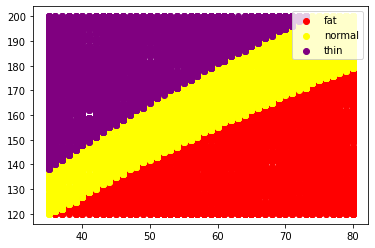

In [18]:
# 시각화 해보기
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
tbl = pd.read_csv("../Data/bmi.csv", index_col=2)

def scatter(lbl, color):
  b = tbl.loc[lbl]
  ax.scatter(b["weight"], b["height"], c = color, label = lbl)

scatter("fat", "red")
scatter("normal", "yellow")
scatter("thin", "purple")
ax.legend()
plt.savefig("../Data/bmi-test.png")
plt.show()

---
# SVM의 종류
- SVC(Classification)
- NuSVC : 위에꺼랑 비슷해서 안 써도 됨
- LinearSVC : SVM 중에서 가장 빠름, SVC 대비 약 3배 정도 빠름

In [25]:
# 데이터 학습하기
svc = LinearSVC()

In [22]:
svc.fit(train_x, train_y)
svc.score(train_x, train_y)

0.9191333333333334

In [23]:
metrics.confusion_matrix(svc.predict(test_x), test_y)

array([[1855,  243,    0],
       [   0, 1078,    0],
       [   0,  215, 1609]])